<a href="https://colab.research.google.com/github/Oec8cek/Ai-Understanding/blob/main/3%EC%A3%BC%EC%B0%A8_linear_regression_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#코랩 탭의 파일구조 내에서 위에서 복제한 실습 자료가 있는 폴더로 이동한다.
%cd /content/ML-01-Linear_Regression

[Errno 2] No such file or directory: '/content/ML-01-Linear_Regression'
/content


# 단순 선형 회귀 (Simple linear regression) (실습)

### [1] 실습 진행 관련 설명
선형 회귀에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

처음에는 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (데이터 측면) 데이터에서 훈련데이터와 테스트 데이터로 구분하기

- (3) (모델 측면) sklearn 라이브러리를 이용하여 선형 회귀 모델 불러오기. 또는 직접 함수 구현하기 (선형회귀 모델 정의).

- (4) (학습 과정) sklearn 라이브러리를 이용하여 모델 학습하기. 또는 직접 구현하기 (경사하강법).

- (5) (성능 평가) 테스트 데이터를 이용하여 학습된 모델에 대한 성능 평가하기. (Mean Squared Error)

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




(참고) pandas, matplotlib, sklearn

이번 실습에서는 numpy외에 pandas, matplotlib, sklearn과 같은 라이브러리가 활용되고 있다. pandas는 행과 열로 구성된 2차원 데이터 처리 기능을 제공하는 라이브러리로 혼자공부하는 머신러닝+딥러닝 교재의 152페이지에 간단한 설명이 제공된다. matplotlib는 그래프등을 통해 데이터를 가시화하는 목적으로 사용되는 라이브러리이다. sklearn 라이브러리는 이번 학기 수업 과정에서 집중적으로 사용될 중요한 라이브러리로 각종 기계학습 모델이 구현되어 있다.

matplotlib와 sklearn은 해당 기능이 소개될때마다 사용법을 학습하도록 하고, pandas를 간단하게 소개하자.

1) Pandas에서는 data frame이라는 객체에 행과 열로 구성된 데이터를 저장한다. 학습하고자 하는 데이터는 현재 csv 포맷으로 저장되어 있는데 read_csv라는 함수로 데이터를 읽어들일 수 있다.

2) pandas의 데이터프레임에서는 컬럼에 부여된 이름을 이용하여 데이터에 접근할 수 있다(참고 : "print(dataset.describe())" 명령을 실행하면 컬럼에 부여된 이름을 확인할 수 있다).실습용 데이터에는 'YearsExperience'와 'Salary'라는 이름이 부여된 컬럼이 존재하는데 "print(dataset['YearsExperience'])"를 실행하면 'YearsExperience'라는 이름의 컬럼 데이터를 확인할 수 있다.

3) pandas에서는 ndarray처럼 []를 이용하여 데이터에 접근한다. pandas만의 인덱싱 방법은 "iloc[]"연산자과 'loc[]'연산인데, "iloc[]"은 아래 코드셀의 코드처럼 행과 열의 숫자값을 지정하여 인덱싱을 수행한다.'loc[]'은 동작이 약간 다른데, 행 위치에는 인덱스 값을, 열의 위치에는 열의 이름을 입력하여 인덱싱할 수 있다(예: "dataset.loc[1:3, 'YearsExperience']")  

**훈련 데이터와 테스트 데이터**

이제까지 강의에서는 학습 데이터라는 존재만을 설명하였다. 예를 들어 선형회귀의 경우 학습 데이터를 활용하여 모델의 인자를 탐색하였다. 그런데, 학습된 모델의 성능을 검증할 때는 어떻게 할까? 이 때는 모델의 학습 과정에서 사용하지 않은 데이터를 이용하여 모델의 예측값을 산출한 후 참값과 비교할 수 있다. "train_test_split"은 학습 데이터를 모델의 학습을 위한 "훈련 데이터"와 학습된 모델의 성능 확인을 위한 "테스트 데이터"로 분할하는 동작을 한다. 훈련 데이터와 테스트 데이터를 구성/분할할 때는 훈련 데이터와 테스트 데이터에 중복되는 개체가 존재하지 않도록 주의할 필요가 있다.

**fit과 predict**

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

상기 코드에서는 (1)  sklearn의 linear_model 패키지에서 "LinearRegression" 모델을 임포트한 후(from sklearn.linear_model import LinearRegression) (2) 우리가 사용할 LinearRegression() 모델의 개체를 생성한다(regressor = LinearRegression()) (3) 그리고 linear regression 모델을 학습시킨다(regressor.fit(X_train, y_train)).

Python의 sklearn 라이브러리는 인터페이스가 표준화가 잘 되어 있어 모델 학습 과정은 "fit()"이라는 함수로 표현되고, 학습된 모델을 이용하여 회귀 값을 예측하고자 할 때는 "predict()" 함수를 사용한다.

"regressor.fit(X_train, y_train)"라는 명령은 "X_train"에 저장된 특징 벡터 집합과 "y_train"에 저장된 참 값 집합을 이용하여 선형 회귀 모델을 학습하라는 내용을 담고 있다.

In [4]:
# 단순 선형 회귀(Simple Linear Regression)

# 라이브러리 불러오기 (Importing the libraries)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error


# (1) (데이터 측면) 데이터 불러오기 (Importing the datas)
dataset = pd.read_csv('/content/sample_data.csv')  #파일 시스템을 통해 CSV 파일 구조를 확인해보자.
X = dataset.iloc[:, :-1].values           #iloc 함수를 통해서 CSV 파일 데이터를 변수에 저장해준다.
y = dataset.iloc[:, 1].values

# (2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기 (Splitting the dataset into the Training set and Test set)
from sklearn.model_selection import train_test_split
#X(특징벡터)와 Y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할
#아래 파라미터(test_size)를 통해서 비율을 설정해줄 수 있다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# 참고 (Feature Scaling) -> 필요시 강의
# 데이터의 따라서 Scaling을 필요로하는 경우도 있다.
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# (3) (모델 측면) 선형 회귀 모델 불러오기
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# (4) (학습 과정) 모델 학습 하기
# 해당 함수 fit 내부에 기존 이론으로 학습했던 1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트 등의 작업이 구현되어 있다.
# 학습과정에서는 Train 데이터만! 사용된다.
regressor.fit(X_train, y_train)

print(regressor.coef_)      #기울기 (단순 선형 회귀의 W_1의 개념)
print(regressor.intercept_) #절편   (단순 선현 회귀의 W_0의 개념)

# (5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기. (Predicting the Test set results)
# 성능평가 과정에서는 Test 데이터만! 사용된다.
y_pred = regressor.predict(X_test)

print(y_test.shape)
print(y_pred.shape)

from sklearn.metrics import r2_score
#R2 Score 라는 평가지표를 통해서 학습이 잘 되었는지 확인해보자.
result = r2_score(y_test, y_pred)

print(result)

[1.45730105e-04 9.99999979e-01]
0.0006898075807839632
(2,)
(2,)
0.9999999999999928


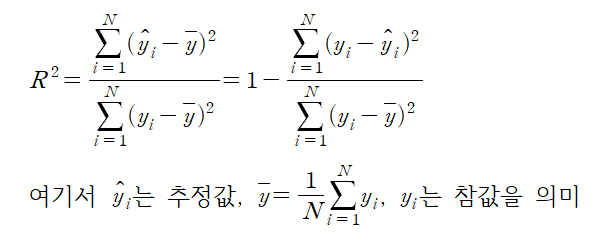

## 추가 설명 - 그래프 그리기 (matplotlib)
### (1) plt.scatter(x축에 반영될 데이터, y축에 반영될 실제값)
- 훈련 데이터셋 또는 테스트 데이터셋이 {($x_1$, $y_1$), ($x_2$, $y_2$), ...($x_i$, $y_i$), ...($x_N$, $y_N$)} 구성되어 있을 때, 그래프 상에 한 점들로 표현이 가능함.

### (2) plt.plot(x축에 반영될 데이터, y축에 반영될 예측값)
- 통상 그래프 형식으로 표현함.
- plt.plot(x, f(x)) 꼴이 많이 쓰임. x는 입력값이고 f(x)는 x에 대한 출력값(또는 예측값).


데이터나 모델의 동작을 가시화하면 직관적으로 특징을 파악하기 쉽다. matplotlib에는 가시화에 필요한 다양한 그래프들이 포함되어 있어 가시화에 도움이 된다.

Text(0, 0.5, 'Salary')

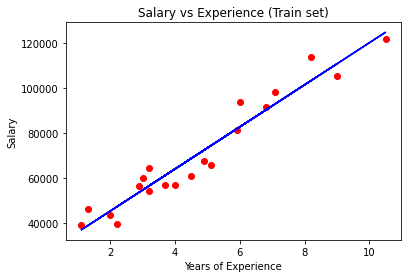

In [ ]:
# 훈련 데이터셋에 대한 시각화 (빨간색)
plt.scatter(X_train, y_train, color = 'red')
# plot으로 기본적으로 그래프를 그림
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

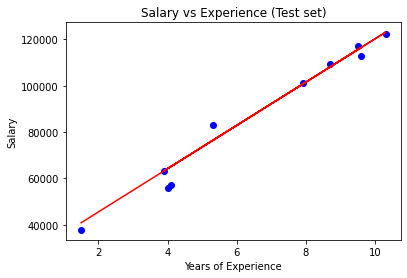

In [ ]:
# 테스트 데이터셋에 대한 시각화 (파란색)
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## (두번째 실습) 직접구현


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch


# 라이브러리 불러오기 (Importing the libraries)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# (1) (데이터 측면) 데이터 불러오기 (Importing the datas)
# 위의 Sklearn 라이브러리와 동일
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

#print(X)
#print(y)

# (2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기 (Splitting the dataset into the Training set and Test set)
# 위의 Sklearn 라이브러리와 동일
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


# SKlearn에서의 (3)번과 (4)번 과정과 동일함에 유의
# (3) (모델 측면) 선형 회귀 모델 정의

# 모델의 파라미터 w (매개변수) 초기값 설정 + 하이퍼 파라미터 선정(학습률)
# 가중치의 값을 초기화(임의의 값으로 설정하는 방법 사용)
w1 = 10
w0 = 10
lr = 0.0025	#학습률(learning rate, lr, 일반적인 경우 0 < lr < 1)

#모델 정의
#단순 선형회귀 모델의 형태는?  f(x) = w0 + w1x
def forward(x):
	return w1 * x + w0


# # (4) (학습 과정) 모델 학습 하기 : 손실함수 정의, 경사하강법 정의, 정해진 반복수에 맞게 모델의 파라미터 업데이트
# 4-1 손실함수 정의하기

#손실함수 정의
#MSE의 식을 잘 생각해볼것! 1/N은 어디로??
def loss_fn(y_pred, y):
  return (y_pred - y) * (y_pred - y)  # (예측값 - 정답값)^2
 	# return np.powery_pred - y, 2)

# 4-2 경사하강법 정의하기 ***
# 가중치 업데이트식을 떠올려보기
# gradient 부분이 아래처럼 어떻게 정의되는지 유도해보자.
def update(x, y, y_pred):
	global w1, w0
	w1 = w1 - lr * 2 * x * (y_pred - y)
	w0 = w0 - lr * 2 * 1 * (y_pred - y)
print(w1, w0)

# 4-3 정해진 반복수(100회) 마다 모델의 파라미터 업데이트

for epoch in range(100):
	for x_val, y_val in zip(X_train, y_train):	#zip을 사용하면 동일 인덱스에 있는 값을 함께 가져온다.
		y_pred = forward(x_val)   # [2] 모델의 예측값
		loss = loss_fn(y_pred, y_val)  # [3] 손실 계산
		update(x_val, y_val, y_pred)    # [4] 손실값을 통한 경사하강법으로 w1, w0 업데이트
		# print(loss)


print(w1, w0) # find w, b

# (5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기. (Predicting the Test set results)
# 기존 sklearn 에서 predict 하던 부분을 직접 구현
# 우리가 구한 w0과 w1을 통해 예측값을 산출해보자.
predict =[(w1[0] * x[0] + w0[0]) for x in X_test]
#R2 Score 관련 수식을 참고해보자.
u = np.sum((predict-y_test)**2)
v = np.sum((y_test-np.average(y_test))**2)

result = 1-u/v
print(result)

from sklearn.metrics import r2_score

result = r2_score(y_test, predict)


print(result)


10 10
[9493.13629957] [24681.57417843]
0.9784483372537969
0.9784483372537969


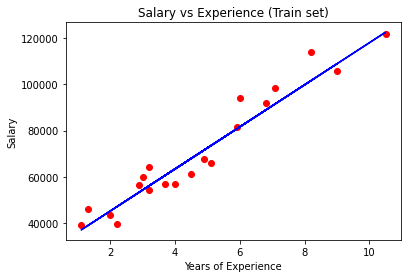

In [ ]:
# 참고 - 시각화
# 내가 구현한 값과 라이브러를 통해 구현한 값의 차이를 확인해보자
# 훈련 데이터셋에 대한 시각화 (빨간색)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, [(w1 * x + w0) for x in X_train], color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

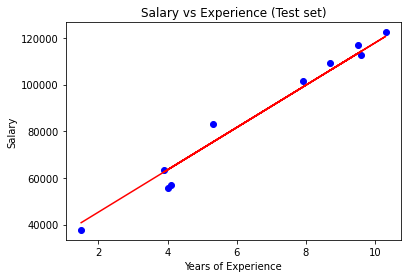

In [ ]:
# 테스트 데이터셋에 대한 시각화 (파란색)
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, [(w1 * x + w0) for x in X_test], color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()